In [2]:
# 필요 라이브러리 로딩
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
print(data.target_names)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# 모든 카테고리 정의
categories =['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 
             'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 
             'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 
             'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 
             'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 
             'talk.politics.misc', 'talk.religion.misc']
# 모든 카테고리 데이터 훈련하기
train = fetch_20newsgroups(subset='train', categories=categories)
# 모든 카테고리 데이터 테스트하기
test = fetch_20newsgroups(subset='test', categories=categories)

In [11]:
# 훈련 데이터 보기
print(test.data[5])
# print(train.data[5])
#print(len(train.data))

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [18]:
# 필수 라이브러리 임포트
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 다항식 나이브베이즈(Multinomial Navie Bayes) 기반 모델 생성
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# 훈련데이터로 모델 훈련하기
model.fit(train.data, train.target)

# 테스트 데이터를 위한 레이블 생성하기
labels = model.predict(test.data)

Text(0.5, 12.453125, 'predicted label')

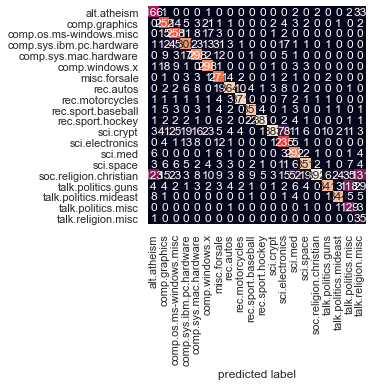

In [19]:
# 혼동 행렬과 히트 맵 생성하기
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names)

# 혼동 행렬의 히트 맵 플로팅하기
plt.xlabel('true label')
plt.xlabel('predicted label')

In [20]:
# 훈련 모델 기반의 새로운 데이터 상 카테고리 예측하기
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [21]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [22]:
predict_category('Sending load to International Space Station')

'sci.space'

In [24]:
predict_category('Audio is better than BMW')

'sci.electronics'

In [25]:
predict_category('Prsident of India')

'soc.religion.christian'